In [6]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [10]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
summary_statistics = df_market_data.describe()
print(summary_statistics)

       price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%

In [16]:
# Create a DataFrame with the scaled data

df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

scaler = StandardScaler()

df_market_data_normalized = scaler.fit_transform(df_market_data)
df_market_data_normalized = pd.DataFrame(df_market_data_normalized, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data
crypto_names = df_market_data.index.tolist()

# Set the coinid column as index
df_market_data_normalized.index.name = "coin_id"

# Display sample data
sample_data_with_names = df_market_data_normalized.copy()
sample_data_with_names.insert(0, "Cryptocurrency", crypto_names)
print(sample_data_with_names.head(10))


                  Cryptocurrency  price_change_percentage_24h  \
coin_id                                                         
bitcoin                  bitcoin                     0.508529   
ethereum                ethereum                     0.185446   
tether                    tether                     0.021774   
ripple                    ripple                    -0.040764   
bitcoin-cash        bitcoin-cash                     1.193036   
binancecoin          binancecoin                     0.891871   
chainlink              chainlink                     0.011397   
cardano                  cardano                     0.102530   
litecoin                litecoin                     0.077497   
bitcoin-cash-sv  bitcoin-cash-sv                     0.448952   

                 price_change_percentage_7d  price_change_percentage_14d  \
coin_id                                                                    
bitcoin                            0.493193                     0.7

---

### Find the Best Value for k Using the Original Data.

In [31]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [21]:
# Create an empty list to store the inertia values

df_market_data_scaled = scaler.fit_transform(df_market_data)
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k

# Inside the loop:
for k in range(1, 12):
# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)

# 2. Fit the model to the data using `df_market_data_scaled`
    model.fit(df_market_data_scaled)
 
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)


print(inertia_values)

C:\Users\zhaoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhaoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhaoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.302379141625, 54.73992194210021, 43.48160605008147, 37.517032490103574, 32.59189097672458, 28.22289929060893, 24.116198421409198]


In [32]:
# Create a dictionary with the data to plot the Elbow curve
inertia_dict = {}
inertia_dict[k] = model.inertia_

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_data = pd.DataFrame({'k': range(1, 12), 'inertia': inertia_values})

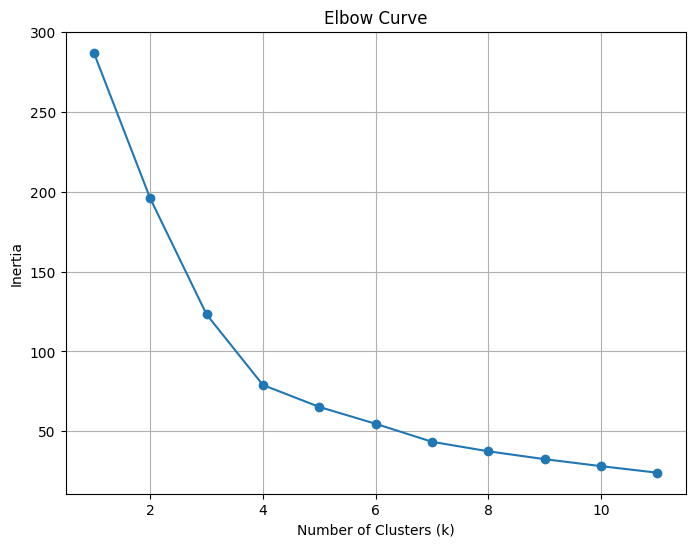

In [33]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(elbow_curve_data['k'], elbow_curve_data['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  4 is the best value of k because its where the inertia starts to level off (rate decrease )

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [34]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [35]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

C:\Users\zhaoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [36]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.

print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [37]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()
print(df_market_data_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [39]:
# Add a new column to the DataFrame with the predicted clusters
cluster_labels = kmeans_model.predict(df_market_data_scaled)
df_market_data['cluster'] = cluster_labels

# Display sample data
print(df_market_data.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [41]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_market_data.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",      # Use the 'cluster' column to color the points
    cmap='Category20', # Choose a color map for the clusters
    marker="circle",   # Specify the marker style
    size=100,          # Specify the size of the markers
    hover_cols=["coin_id"],  # Include 'coin_id' in hover information
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)",
    title="Cryptocurrency Clusters",
    width=600,         # Specify the width of the plot
    height=400         # Specify the height of the plot
)


scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [42]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [43]:
# Use the PCA model with `fit_transform` to reduce to 

df_reduced = pca_model.fit_transform(df_market_data_scaled)

# three principal components.

df_reduced = pd.DataFrame(df_reduced, columns=["PC1", "PC2", "PC3"])

# View the first five rows of the DataFrame. 
print(df_reduced.head())

        PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715


In [44]:
# Retrieve the explained variance to determine how much information 

explained_variance = pca_model.explained_variance_ratio_

# can be attributed to each principal component.

for i, variance in enumerate(explained_variance):
    print(f"Explained variance of PC{i+1}: {variance:.4f}")

Explained variance of PC1: 0.3720
Explained variance of PC2: 0.3470
Explained variance of PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  The total variance is 89.50% (pc1(37.20%) + pc2(34.70%) + pc3(17.60%))

In [45]:
# Create a new DataFrame with the PCA data.

df_pca = pca_model.fit_transform(df_market_data_scaled)

# Creating a DataFrame with the PCA data

df_pca_data = pd.DataFrame(df_pca, columns=["PC1", "PC2", "PC3"])


# Copy the crypto names from the original data

df_pca_data["coin_id"] = df_market_data.index

# Set the coinid column as index

df_pca_data.set_index("coin_id", inplace=True)

# Display sample data
print(df_pca_data.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [46]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [47]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    
# Inside the loop:

# 1. Create a KMeans model using the loop counter for the n_clusters
 kmeans_model = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_pca`
 kmeans_model.fit(df_pca_data)
# 3. Append the model.inertia_ to the inertia list
 inertia_values.append(kmeans_model.inertia_)

C:\Users\zhaoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhaoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhaoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

In [48]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
print(df_elbow)

    k_values  inertia_values
0          1      256.874086
1          2      165.901994
2          3       93.774626
3          4       49.665497
4          5       37.839466
5          6       30.777746
6          7       21.134056
7          8       17.091637
8          9       13.681140
9         10       10.630648
10        11        8.128620


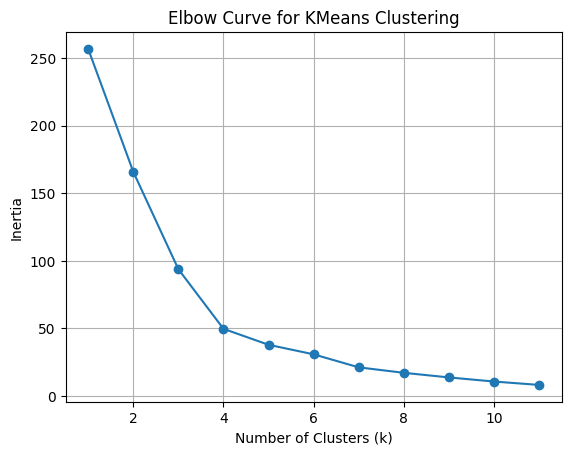

In [49]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 

# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for KMeans Clustering')
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** K=4 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** For this data both original and pca are consistant 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [50]:
# Initialize the K-Means model using the best value for k

k_pca = 4

kmeans_model = KMeans(n_clusters=4, random_state=42)

In [51]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca_data)

C:\Users\zhaoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [52]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans_model.predict(df_pca_data)
# Print the resulting array of cluster values.
print(clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [53]:
# Create a copy of the DataFrame with the PCA data
df_pca_data_copy = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_data_copy['predicted_cluster'] = clusters

# Display sample data
print(df_pca_data_copy.head())

                   PC1       PC2       PC3  predicted_cluster
coin_id                                                      
bitcoin      -0.600667  0.842760  0.461595                  0
ethereum     -0.458261  0.458466  0.952877                  0
tether       -0.433070 -0.168126 -0.641752                  2
ripple       -0.471835 -0.222660 -0.479053                  2
bitcoin-cash -1.157800  2.041209  1.859715                  0


In [54]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


scatter_plot = df_pca_data_copy.hvplot.scatter(x='PC1', y='PC2', by='predicted_cluster', hover_cols=['coin_id'])
scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [55]:
# Composite plot to contrast the Elbow curves
composite_plot = df_elbow.hvplot.line(x='k_values', y='inertia_values', xlabel='Number of Clusters (k)', ylabel='Inertia',
                                      title='Elbow Curves for Different Values of k', line_dash='dotted')
composite_plot

:Curve   [k_values]   (inertia_values)

In [56]:
# Composite plot to contrast the clusters
composite_plot = df_pca_data_copy.hvplot.scatter(x='PC1', y='PC2', by='predicted_cluster', hover_cols=['coin_id'],
                                                 xlabel='PC1', ylabel='PC2', title='Contrasting Clusters',
                                                 cmap='Set1', width=800, height=500)
composite_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  * We reduce the number of dimensions in the data when we use PCA, but still maintains the important patterns of variability. This simplifies the data.
  * Clusters are easier to understand with fewer features due to simplicity.
  * By removing the other dimensions that are considered less important, this reduces the noise in the data.
  * However, fewer features means there will be some information from the data is lost.
  * Depending on the data, cluster seperation may overlap due to loss of dimensions. In other cases it can improve the more important dimensions.
  * Having a smaller dimension can also emphasize which leads to a tigher clusters.
  * The advantage of using fewer features is calculating larger datasets much more quickly. 